### Ce jeu de donnée contient des transactions anonymisées, et étiquettées suivant si elles sont frauduleuses ou non. Il a la particularité d'être très déséquilibré entre le nombre de transaction normales et frauduleuses, et permet ainsi d'illustrer l'application d''apprentissage supervisé à la detection d'anomalies très minoritaires.

# 1ere étape : Chargement et parsing des données 

In [1]:
import pandas as pd
import seaborn
import numpy as np
import datetime
import matplotlib.pyplot as plt
import linecache

file = './data/creditcard.csv'


df = pd.read_csv(file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Les données sont composées de deux colonnes temps et montant, et de 28 colonnes anonymisées sous formes de features. 30 features par donnée au total, plus une colonne class qui contient les labels. 

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Il n'y a pas de valeur manquante qu'il faudrait compléter ou extrapoler

# 2eme étape : Jetter un coup d'oeil aux données

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Les features V1 à v28 sont déjà standardisées (moyenne à zéro et écart-type proche de 1). La colonne temps et celle montant ne le sont pas, et pourraient donc être à standardiser ou exclure pour des algorithmes le nécessitant (comme la PCA).

In [13]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
()
Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


### Le jeu de donnée est très fortement déséquilibré. C'est un point à faire attention lors de l'évaluation des performance, et peut mener à supprimer/extrapoler des données du jeu d'origine pour un meilleur entraînement.

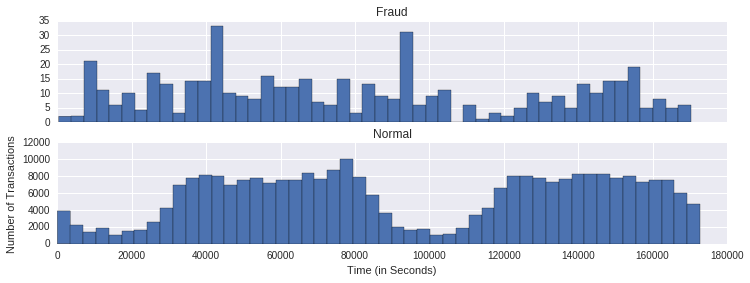

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

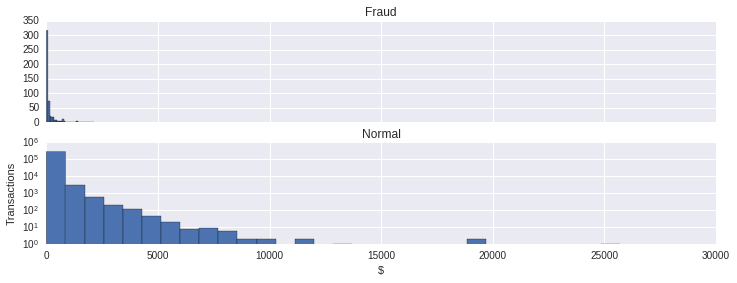

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1],bins=bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0],bins=bins)
ax2.set_title('Normal')

plt.xlabel('$')
plt.ylabel('Transactions')
plt.yscale('log')
plt.show()

### Les transactions frauduleuses ont l'air d'être différenciables des transactions normales comme elles suivent des distributions différentes.

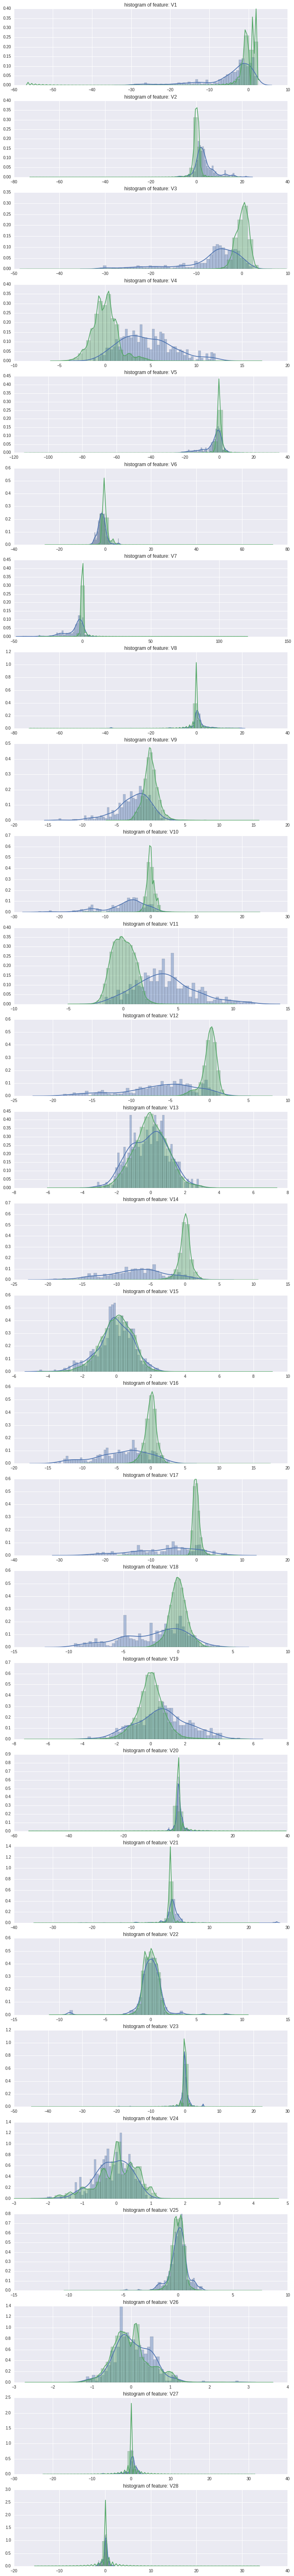

In [22]:
import matplotlib.gridspec as gridspec
import seaborn as sns
#Select only the anonymized features.
v_features = df.ix[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### Some of the feature looks more distinctives than others, we could try dropping the non informatives ones (df.drop([list_of_column_names])) to see if it improves performance

# 3eme étape : séparer le jeu de donnée en entraînement et validation

In [3]:
from sklearn.model_selection import train_test_split

labels = df['Class']
x_train, x_valid, y_train, y_valid = train_test_split(df.drop(['Class'],axis=1),labels)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# a short fonction to evaluate our models
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy :",accuracy_score(labels_test,pred))
    print("Taux de rappel:",recall_score(labels_test,pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model(clf, x_train, x_valid,y_train,y_valid)

Accuracy : 0.9989607033510295
Taux de rappel: 0.6016949152542372


d:\projects\ynov\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


NameError: name 'sns' is not defined

<Figure size 432x216 with 0 Axes>

### L'accuracy et le recall montrent des performances différentes, comment intérpréter ces résultats ?

### Il existe plusieurs solution, nous proposons ici de faire de l'undersampling, pour équilibrer le ratio entre transaction normales et frauduleuses. Un avantage immédiat de l'undersampling est qu'il permet des entraînements plus rapides.

In [2]:
# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

x_under = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_under = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Pourcentage de transaction normales dans le jeu resamplé: ", float(len(under_sample_data[under_sample_data.Class == 0]))/len(under_sample_data))
print("Nombre total de transactions ", len(under_sample_data))
x_train_under, x_valid_under, y_train_under, y_valid_under = train_test_split(x_under, y_under)

AttributeError: 'DataFrame' object has no attribute 'ix'

# Etape 5 : entrainer des modèles

('Accuracy :', 0.92682926829268297)
('Taux de rappel:', 0.87121212121212122)


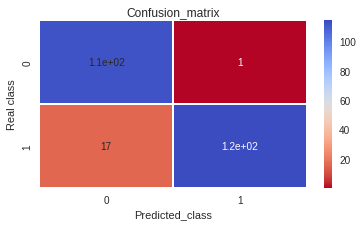

In [67]:
clf=LogisticRegression()
model(clf, x_train_under, x_valid_under,y_train_under,y_valid_under)

/home/mce3/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('Accuracy :', 0.94308943089430897)
('Taux de rappel:', 0.91666666666666663)


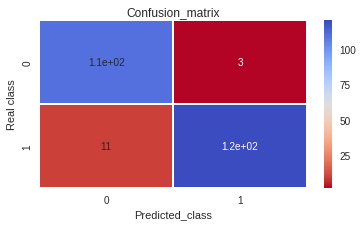

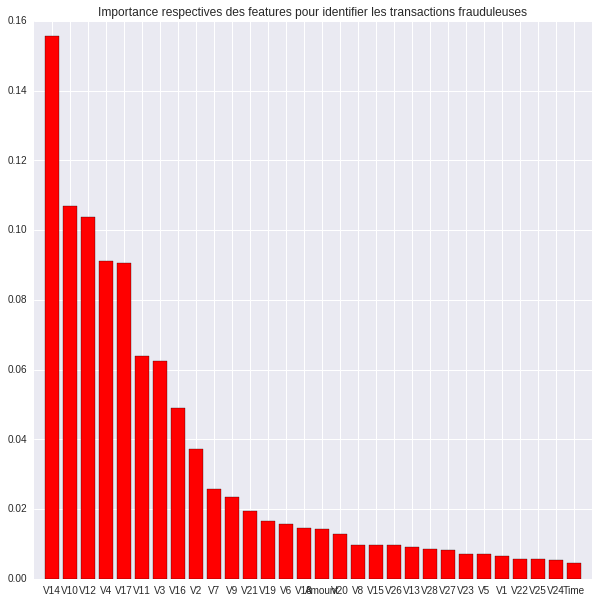

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
model(clf, x_train_under, x_valid_under,y_train_under,y_valid_under)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Bonus : les randoms forests permettent de facilement visualiser l'importance des feature dans la tache
plt.figure(figsize=(10,10))
plt.title("Importance respectives des features pour identifier les transactions frauduleuses")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(x_train.shape[1]), df.columns[indices])
plt.xlim([-1, x_train.shape[1]])
plt.show()

### On peut observer que le choix des features est dans l'ensemble cohérent avec l'observation des distribution des features faite au préalable.

# Etape 5 bis : essayer de faire mieux !
## Quelques pistes : 
### - utiliser des modèles plus performants (boosted tree, randomforest, svm)
### - explorer de meilleurs paramètres de modèles
### - restreindre aux features les plus pertinentes
### - enlever ou normaliser les features non normalisées (temps et montant)
### - utiliser d'autres techniques pour équilibrer le jeu de données (oversampling, rajouter plus de non frauduleuses)